In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
ranked = pd.read_csv("Consolidated data for figures - 2020_09_23_hit_rate_top_rank_late_max_fusion_annotated.csv")
#ranked = pd.read_csv("Consolidated data for figures - 2020-09-08-hit-rate-ranked.csv")
ranked.descriptor = ranked.descriptor.str.replace("CP", "CS")
ranked

,assay_id,top_rank_hit_rate,descriptor,readouts,hits,hit_rate,ASSAY_TYPE,auc
0,1_1,0.0,CS+GE+MO,NaN,NaN,NaN,bacterial,NaN
1,10_19,0.0,CS+GE+MO,NaN,NaN,NaN,NaN,NaN
2,10_20,0.0,CS+GE+MO,17.0,1.0,0.058824,NaN,0.500000
3,100_277,0.0,CS+GE+MO,9.0,2.0,0.222222,NaN,0.357143
4,100_278,1.0,CS+GE+MO,10.0,5.0,0.500000,NaN,0.880000
...,...,...,...,...,...,...,...,...
2111,90_256,0.0,GE+MO,29.0,2.0,0.068966,biochem,0.314815
2112,91_257,0.0,GE+MO,8.0,1.0,0.125000,NaN,0.714286
2113,92_258,0.0,GE+MO,8.0,4.0,0.500000,NaN,0.562500
2114,93_259,0.0,GE+MO,24.0,5.0,0.208333,biochem,0.589474


In [4]:
# #auc = pd.read_csv("late_fusion_auc.csv")
# auc = pd.read_csv("Consolidated data for figures - auc 0.7 0.9 all assays.csv")
# auc.descriptor = auc.descriptor.str.replace("CP","CS")
# auc

In [5]:
# auc.descriptor.unique()

In [6]:
df2 = pd.read_csv("Consolidated data for figures - auc 0.7 0.9 all assays Early Fusion.csv")
df2["descriptor"] = df2.descriptor.str.replace("CP", "CS")
df3 = pd.read_csv("Consolidated data for figures - 2020-09-08-hit-rate-ranked Early Fusion.csv")
df4 = pd.merge(df2, df3, on=["assay_id","descriptor"], how="left")
df4 = df4[["assay_id", "top_rank_hit_rate", "descriptor", "readouts", "hits", "hit_rate", "auc"]]

In [7]:
df4.groupby("descriptor").mean()

,top_rank_hit_rate,readouts,hits,hit_rate,auc
descriptor,,,,,
CS,0.303903,372.223404,11.989362,0.161369,0.636266
CS+GE,0.349981,372.223404,11.989362,0.161369,0.603221
CS+GE+MO,0.445021,372.223404,11.989362,0.161369,0.709301
CS+MO,0.468504,372.223404,11.989362,0.161369,0.702089
GE,0.339931,372.223404,11.989362,0.161369,0.598926
GE+MO,0.407486,372.223404,11.989362,0.161369,0.681961
MO,0.427104,372.223404,11.989362,0.161369,0.693120


In [8]:
data = pd.concat([ranked, df4[df4.descriptor.isin(["CS","GE","MO"])]])

In [9]:
#data = ranked #pd.merge(ranked, auc, on=["assay_id", "descriptor"])
data["folds_improvement"] = data.top_rank_hit_rate / data.hit_rate
data

,assay_id,top_rank_hit_rate,descriptor,readouts,hits,hit_rate,ASSAY_TYPE,auc,folds_improvement
0,1_1,0.0,CS+GE+MO,NaN,NaN,NaN,bacterial,NaN,NaN
1,10_19,0.0,CS+GE+MO,NaN,NaN,NaN,NaN,NaN,NaN
2,10_20,0.0,CS+GE+MO,17.0,1.0,0.058824,NaN,0.500000,0.0
3,100_277,0.0,CS+GE+MO,9.0,2.0,0.222222,NaN,0.357143,0.0
4,100_278,1.0,CS+GE+MO,10.0,5.0,0.500000,NaN,0.880000,2.0
...,...,...,...,...,...,...,...,...,...
2625,201_660,0.0,GE,41.0,1.0,0.024390,NaN,0.000000,0.0
2628,10_20,0.0,MO,17.0,1.0,0.058824,NaN,0.000000,0.0
2629,105_342,0.0,MO,15.0,1.0,0.066667,NaN,0.000000,0.0
2630,116_426,0.0,MO,26.0,1.0,0.038462,NaN,0.000000,0.0


In [10]:
#data = data.drop(labels="ASSAY_TYPE", axis=1).dropna(axis=0)

In [11]:
data[data.auc > 0.9].groupby("descriptor")[["top_rank_hit_rate", "auc", "hit_rate", "folds_improvement"]].mean()


,top_rank_hit_rate,auc,hit_rate,folds_improvement
descriptor,,,,
CS,0.698583,0.961241,0.171752,8.182820
CS+GE,0.784226,0.957859,0.142730,8.394798
CS+GE+MO,0.863885,0.972418,0.152163,8.617300
CS+MO,0.806740,0.973678,0.161851,9.161379
GE,0.747826,0.967305,0.141140,6.936522
GE+MO,0.887356,0.975529,0.173540,7.146278
MO,0.736592,0.977413,0.127467,9.384897


In [12]:
data[data.auc > 0.9].groupby("descriptor")[["folds_improvement"]].max()


,folds_improvement
descriptor,
CS,45.555556
CS+GE,35.350198
CS+GE+MO,35.350198
CS+MO,42.625000
GE,18.040000
GE+MO,25.625000
MO,42.625000


In [13]:
data[data.auc > 0.9].groupby("descriptor").count()

,assay_id,top_rank_hit_rate,readouts,hits,hit_rate,ASSAY_TYPE,auc,folds_improvement
descriptor,,,,,,,,
CS,43,43,43,43,43,0,43,43
CS+GE,32,32,32,32,32,7,32,32
CS+GE+MO,62,62,62,62,62,16,62,62
CS+MO,71,71,71,71,71,25,71,71
GE,23,23,23,23,23,0,23,23
GE+MO,58,58,58,58,58,11,58,58
MO,67,67,67,67,67,0,67,67


In [14]:
data[data.auc > 0.9].groupby("descriptor").mean()


,top_rank_hit_rate,readouts,hits,hit_rate,auc,folds_improvement
descriptor,,,,,,
CS,0.698583,201.139535,5.604651,0.171752,0.961241,8.182820
CS+GE,0.784226,133.843750,4.718750,0.142730,0.957859,8.394798
CS+GE+MO,0.863885,180.919355,5.274194,0.152163,0.972418,8.617300
CS+MO,0.806740,215.591549,5.140845,0.161851,0.973678,9.161379
GE,0.747826,59.043478,1.913043,0.141140,0.967305,6.936522
GE+MO,0.887356,35.155172,2.948276,0.173540,0.975529,7.146278
MO,0.736592,183.313433,3.000000,0.127467,0.977413,9.384897


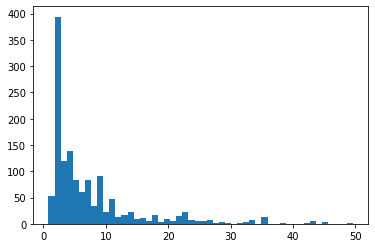

In [15]:
h = plt.hist(data[(data.folds_improvement > 0)].folds_improvement, bins=50)


<ipython-input-16-6abbd3e31765>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.arange(0,0.6,0.01), 1/np.arange(0,0.6,0.01), color="red", linestyle="--")


<AxesSubplot:xlabel='hit_rate', ylabel='folds_improvement'>

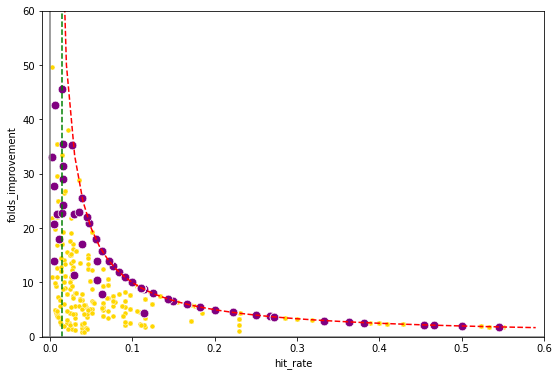

In [16]:
plt.figure(figsize=(9,6))

plt.plot(np.arange(0,0.6,0.01), 1/np.arange(0,0.6,0.01), color="red", linestyle="--")
plt.axvline(x=0.00, color="gray")
plt.axvline(x=0.015, color="green", linestyle="--")
plt.axhline(y=0.00, color="gray")
plt.ylim(-0.01,60)
plt.xlim(-0.01,0.6)

D = data[~(data.auc > 0.9) & (data.top_rank_hit_rate > 0) & (data.hit_rate < 0.6)]
sb.scatterplot(x=D.hit_rate, y=D.folds_improvement, color="gold", s=25)
D = data[(data.auc > 0.9) & (data.top_rank_hit_rate > 0)]
sb.scatterplot(x=D.hit_rate, y=D.folds_improvement, color="purple", s=75)


In [17]:
data[(data.hit_rate <= 1) & (data.auc > 0.9)].groupby("descriptor")[["top_rank_hit_rate", "auc", "hit_rate", "folds_improvement"]].mean()

,top_rank_hit_rate,auc,hit_rate,folds_improvement
descriptor,,,,
CS,0.698583,0.961241,0.171752,8.182820
CS+GE,0.784226,0.957859,0.142730,8.394798
CS+GE+MO,0.863885,0.972418,0.152163,8.617300
CS+MO,0.806740,0.973678,0.161851,9.161379
GE,0.747826,0.967305,0.141140,6.936522
GE+MO,0.887356,0.975529,0.173540,7.146278
MO,0.736592,0.977413,0.127467,9.384897


<AxesSubplot:xlabel='hit_rate', ylabel='auc'>

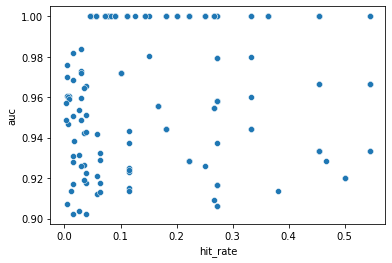

In [18]:
sb.scatterplot(x=D.hit_rate, y=D.auc)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='folds_improvement', ylabel='Density'>

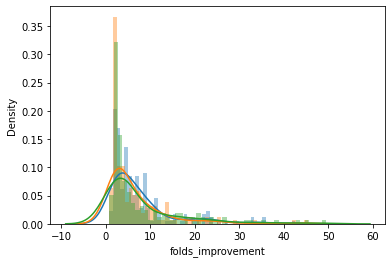

In [19]:
sb.distplot(data[(data.descriptor == "MO") & (data.folds_improvement > 0)].folds_improvement, bins=50)
sb.distplot(data[(data.descriptor == "GE") & (data.folds_improvement > 0)].folds_improvement, bins=50)
sb.distplot(data[(data.descriptor == "CS") & (data.folds_improvement > 0)].folds_improvement, bins=50)


<AxesSubplot:xlabel='auc', ylabel='folds_improvement'>

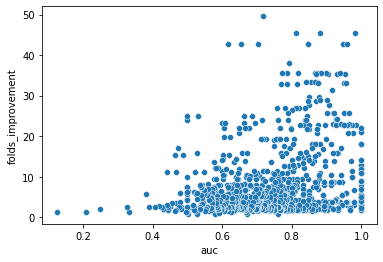

In [20]:
sb.scatterplot(data=data[data.folds_improvement>0], x="auc", y="folds_improvement")

In [21]:
data[(data.auc > 0.9) & (data.folds_improvement > 40)]

,assay_id,top_rank_hit_rate,descriptor,readouts,hits,hit_rate,ASSAY_TYPE,auc,folds_improvement
1292,177_587,0.250000,CS+MO,341.0,2.0,0.005865,cell,0.946903,42.625000
183,186_669,0.666667,CS,205.0,3.0,0.014634,NaN,0.981848,45.555556
217,177_587,0.250000,MO,341.0,2.0,0.005865,NaN,0.960177,42.625000


In [22]:
known_assay_types = data[~data.ASSAY_TYPE.isna()].groupby(["assay_id", "ASSAY_TYPE"]).count().reset_index()
known_assay_types = known_assay_types[["assay_id", "ASSAY_TYPE"]]

In [23]:
other_data = pd.merge(data, known_assay_types, on=["assay_id"], how="left")

In [24]:
other_data[(other_data.auc > 0.9) & (other_data.folds_improvement > 40)]

,assay_id,top_rank_hit_rate,descriptor,readouts,hits,hit_rate,ASSAY_TYPE_x,auc,folds_improvement,ASSAY_TYPE_y
1292,177_587,0.250000,CS+MO,341.0,2.0,0.005865,cell,0.946903,42.625000,cell
2183,186_669,0.666667,CS,205.0,3.0,0.014634,NaN,0.981848,45.555556,cell
2198,177_587,0.250000,MO,341.0,2.0,0.005865,NaN,0.960177,42.625000,cell


In [25]:
data[data.descriptor == "MO"].groupby("ASSAY_TYPE").count()

,assay_id,top_rank_hit_rate,descriptor,readouts,hits,hit_rate,auc,folds_improvement
ASSAY_TYPE,,,,,,,,


In [26]:
data.groupby("ASSAY_TYPE").count()

,assay_id,top_rank_hit_rate,descriptor,readouts,hits,hit_rate,auc,folds_improvement
ASSAY_TYPE,,,,,,,,
bacterial,88,88,88,68,68,68,68,68
biochem,212,212,212,200,200,200,200,200
cell,340,340,340,320,320,320,320,320
fungal,12,12,12,12,12,12,12,12
viral,8,8,8,8,8,8,8,8
worm,4,4,4,4,4,4,4,4
yeast,40,40,40,36,36,36,36,36
